In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [113]:
raw_data = pd.read_csv('./train.csv')
raw_data.head()
raw_data.loc[raw_data['location'] == 'News',:]
raw_data.loc[raw_data['location'].str.contains(pat='ews',regex=False).fillna(False),['location','target']]

,location,target
146,Financial News and Views,1
235,Û¢ Views From The Six Û¢,0
1121,"Screwston, TX",1
2193,World news,1
2303,Shrewsbury,0
2752,News,1
2759,contactSimpleNews@gmail.com,1
2922,Financial News and Views,1
3350,Breaking News,1
3758,Zac Newsome loves me,0


In [77]:
raw_data.groupby('location').agg({'target':['count','sum']})[('target','sum')].nlargest(10) #Top ten ubicaciones con mas tweets verdaderos

location
unknown          524
usa               70
news              53
california        34
nigeria           28
united states     28
india             26
japan             22
mumbai            21
new york          21
Name: (target, sum), dtype: int64

In [34]:
data_grouped_location = raw_data.groupby('location').agg({'target':['count','sum']})
data_grouped_location.columns = ['target_count','target_sum']
data_grouped_location.sort_values(by='target_sum',ascending=False)

,target_count,target_sum
location,,
unknown,1644,524
usa,111,70
news,66,53
california,46,34
nigeria,35,28
...,...,...
"irving , texas",1,0
"island lake, il",1,0
it's a journey,1,0


In [35]:
droped = data_grouped_location.drop(data_grouped_location[data_grouped_location['target_count'] < 10].index)
droped['target_count'].nsmallest(10)

location
calgary            10
dallas, tx         10
hell               10
london, england    10
london, uk         10
new york city      10
sacramento, ca     10
ss                 10
turkey             10
atlanta, ga        11
Name: target_count, dtype: int64

In [36]:
droped['truth_percentage'] = (droped['target_sum']*100) / droped['target_count']
droped.head()
droped_sorted = droped.sort_values(by='truth_percentage',ascending=False)

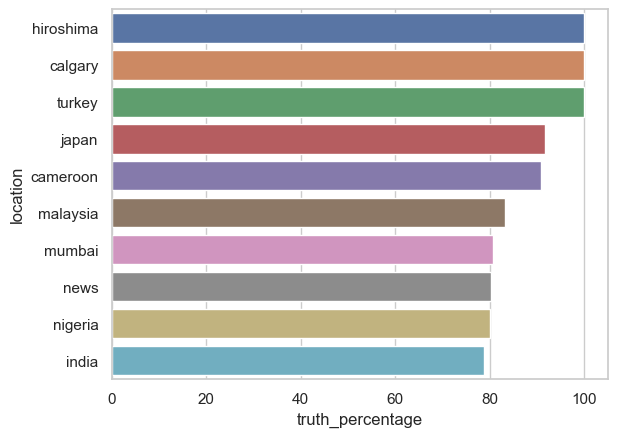

In [37]:
g = sns.barplot(x=droped_sorted['truth_percentage'].nlargest(10),y=droped_sorted['truth_percentage'].nlargest(10).index,orient='h')

In [118]:
index_most_tweeted = droped_sorted['target_count'].nlargest(50).index
index_most_tweeted =index_most_tweeted.drop('unknown')
droped_sorted.loc['unknown']

target_count                   1,644.00
target_sum                       524.00
truth_percentage                  31.87
Name: unknown, dtype: float64

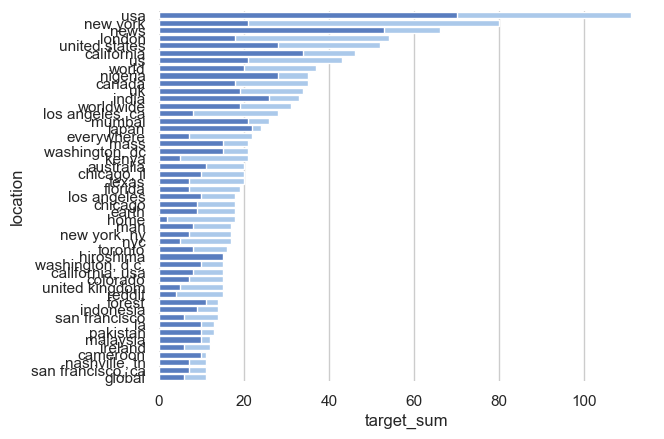

In [119]:
# Initialize the matplotlib figure

sns.set_color_codes("pastel")
sns.barplot(x=droped_sorted.loc[index_most_tweeted]['target_count'],y=index_most_tweeted,
            label="Most tweeted locations", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x=droped_sorted.loc[index_most_tweeted]['target_sum'],y=index_most_tweeted,
            label="Amount of true tweets", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [47]:
#Getting the data for location-keyword relationshp analysis

twitterKeywordAndLocation = pd.read_csv('./train.csv',\
                         usecols = ['keyword', 'location'])
twitterKeywordAndLocation.head()

,keyword,location
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [48]:
#Some of DataFrame's properties
twitterKeywordAndLocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
dtypes: object(2)
memory usage: 119.1+ KB


In [49]:
twitterKeywordAndLocation.count()

keyword     7552
location    5080
dtype: int64

In [50]:
#Changing DataFrmae columns data types in order to apply some operations on them 

twitterKeywordAndLocation['keyword'] = twitterKeywordAndLocation['keyword'].astype('string')
twitterKeywordAndLocation['location'] = twitterKeywordAndLocation['location'].astype('string')

In [51]:
#Cleaning the data

#Dropping null values
twitterKeywordAndLocation.dropna(inplace = True)
twitterKeywordAndLocation.count()

keyword     5080
location    5080
dtype: int64

In [52]:
#We consider that those locations containing non-alphanumerical characters are not real
#Dropping false locations
twitterKeywordAndLocation = twitterKeywordAndLocation[~twitterKeywordAndLocation['location'].str.isalnum()]
twitterKeywordAndLocation

,keyword,location
32,ablaze,Est. September 2012 - Bristol
34,ablaze,"Philadelphia, PA"
35,ablaze,"London, UK"
37,ablaze,World Wide!!
39,ablaze,Paranaque City
...,...,...
7572,wrecked,"Manhattan, NY"
7573,wrecked,"Denton, Texas"
7577,wrecked,#NewcastleuponTyne #UK
7579,wrecked,"Vancouver, Canada"


In [53]:
#Dropping those locations that don't have a significant amount of keywords
#For that, first we see the average
twitterKeywordAndLocation['location'].value_counts().mean()

1.340524991010428

In [54]:
#Then, we filter
twitterKeywordAndLocation = twitterKeywordAndLocation.groupby('location').filter(lambda x: len(x) > 4)
twitterKeywordAndLocation.count()

keyword     596
location    596
dtype: int64

In [55]:
#Visualization

#Counter of keywords
twitterKeywordAndLocation['counter'] = 1
twitterKeywordAndLocation

,keyword,location,counter
35,ablaze,"London, UK",1
56,ablaze,South Africa,1
64,ablaze,"Calgary, AB",1
66,ablaze,San Francisco,1
68,accident,"Nashville, TN",1
...,...,...,...
7496,wreck,United States,1
7523,wreckage,Southern California,1
7544,wrecked,"Brooklyn, NY",1
7547,wrecked,United States,1


In [56]:
#Amount of keywords per location
keywordsPerLocation = twitterKeywordAndLocation.groupby('location').agg({'counter' : 'sum'}).sort_values(by = 'counter', ascending = False)
keywordsPerLocation

,counter
location,
New York,71
United States,50
"Los Angeles, CA",26
"Washington, DC",21
"Chicago, IL",18
...,...
"Cleveland, OH",5
"Calgary, AB",5
"Boston, MA",5


Text(0.5, 0, 'Location')

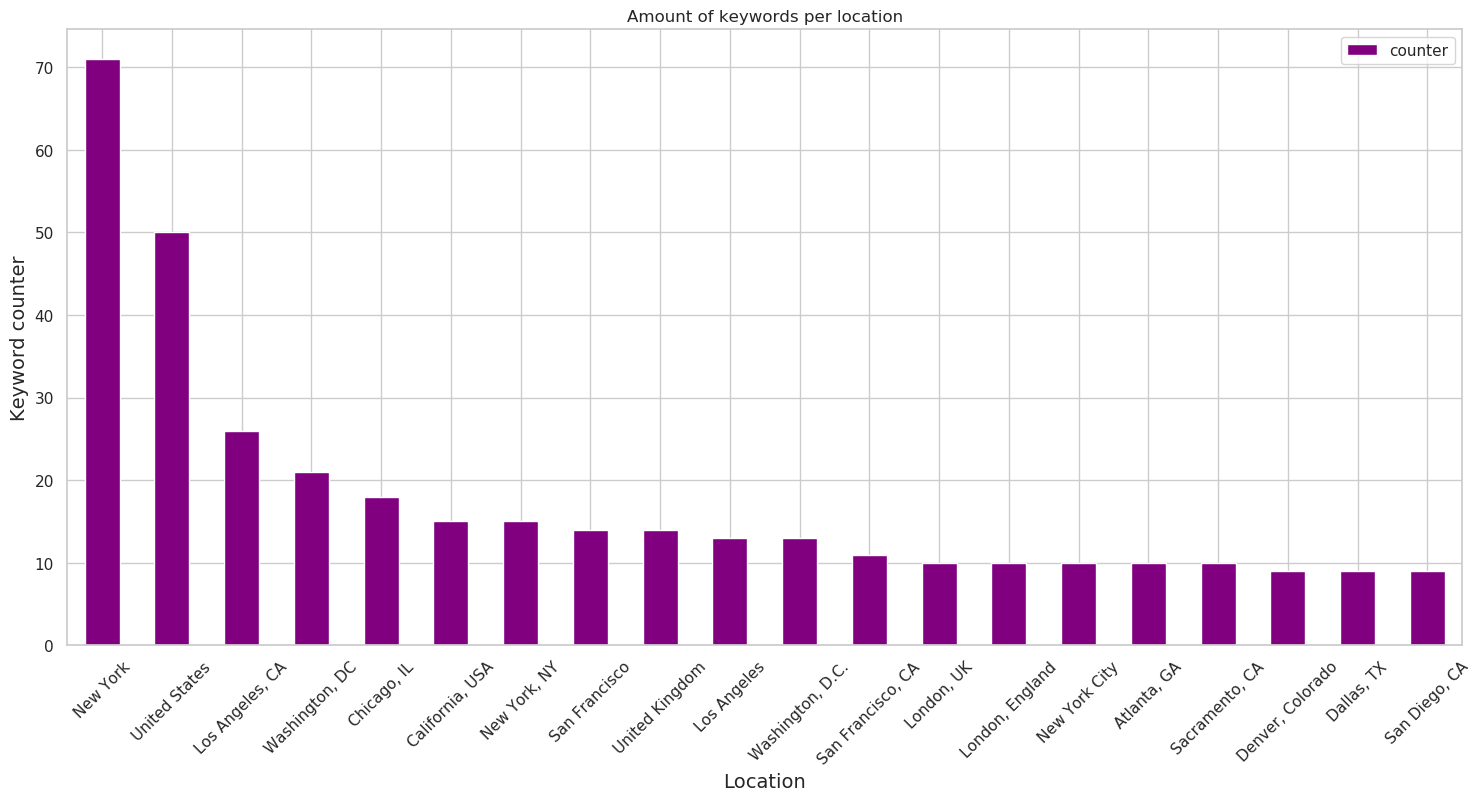

In [57]:
#barplot

ax = keywordsPerLocation.head(20).plot(kind = 'bar', figsize = (18, 8), rot = 45,\
                                   title = 'Amount of keywords per location',\
                                  color = 'purple')
ax.set_ylabel('Keyword counter', size = 14)
ax.set_xlabel('Location', size = 14)

In [58]:
#Most popular keywords
keywordsPopular = twitterKeywordAndLocation.groupby('keyword').agg({'counter' : 'sum'}).sort_values(by = 'counter', ascending = False)
keywordsPopular.mean()

counter                   3.10
dtype: float64

In [59]:
keywordsPopular = keywordsPopular[keywordsPopular['counter'] > 1]
keywordsPopular.head()

,counter
keyword,
flood,16
body%20bag,12
derail,11
displaced,11
catastrophic,9


Text(0.5, 0, 'Keyword')

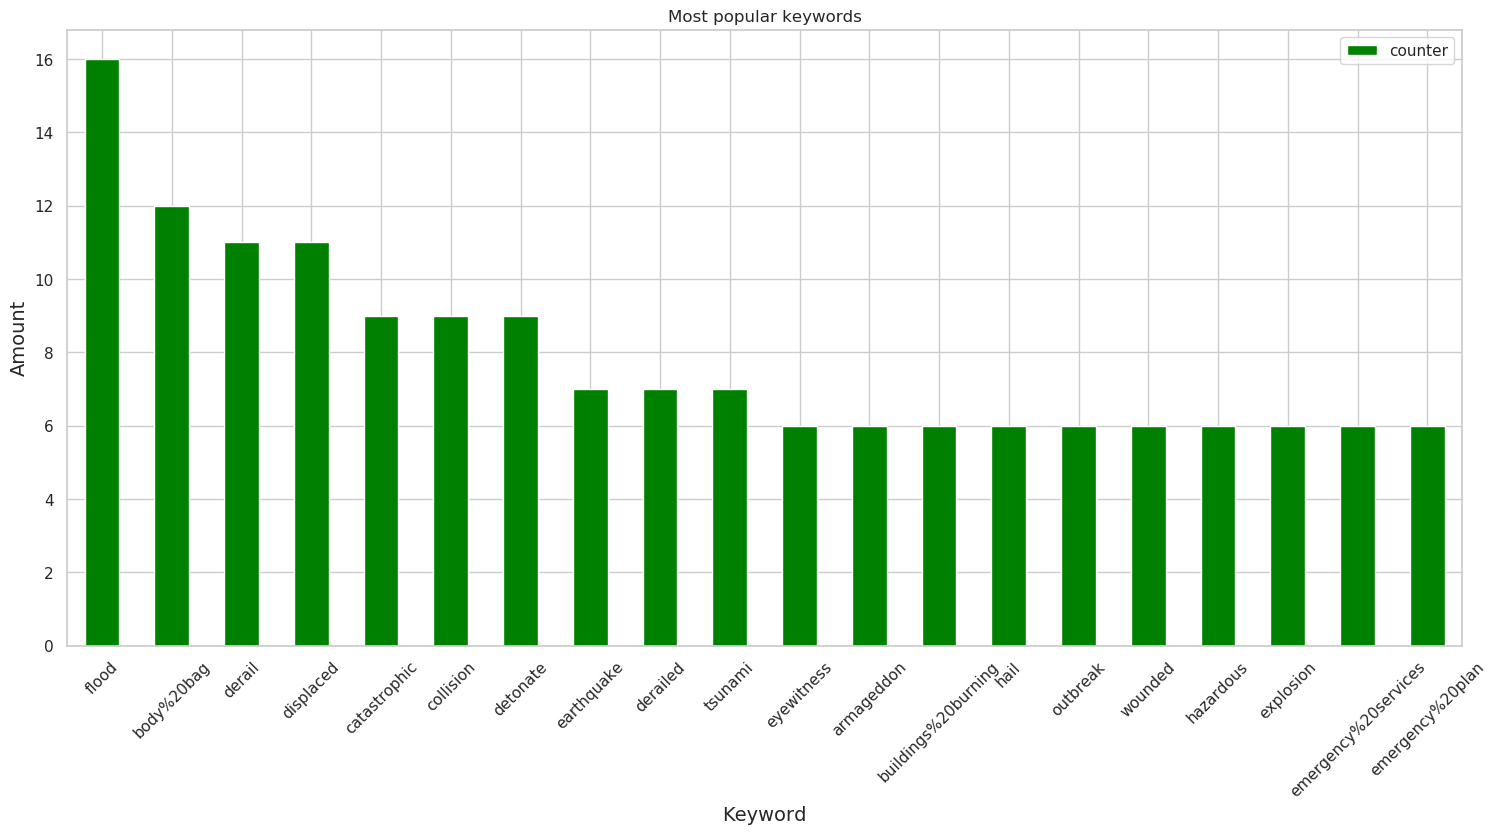

In [60]:
#barplot

ax = keywordsPopular.head(20).plot(kind = 'bar', figsize = (18, 8), rot = 45,\
                                   title = 'Most popular keywords',\
                                  color = 'green')
ax.set_ylabel('Amount', size = 14)
ax.set_xlabel('Keyword', size = 14)

In [61]:
#Comparison between locations with most keywords and most popular keywords
locationAndKeyword = twitterKeywordAndLocation
locationAndKeyword = pd.merge(locationAndKeyword, keywordsPopular, on = 'keyword')
locationAndKeyword['counter'] = locationAndKeyword['counter_x'] + locationAndKeyword['counter_y']
locationAndKeyword = locationAndKeyword.drop(['counter_x', 'counter_y'], axis = 1)
locationAndKeyword.fillna(0)
locationAndKeyword = locationAndKeyword.head(40)

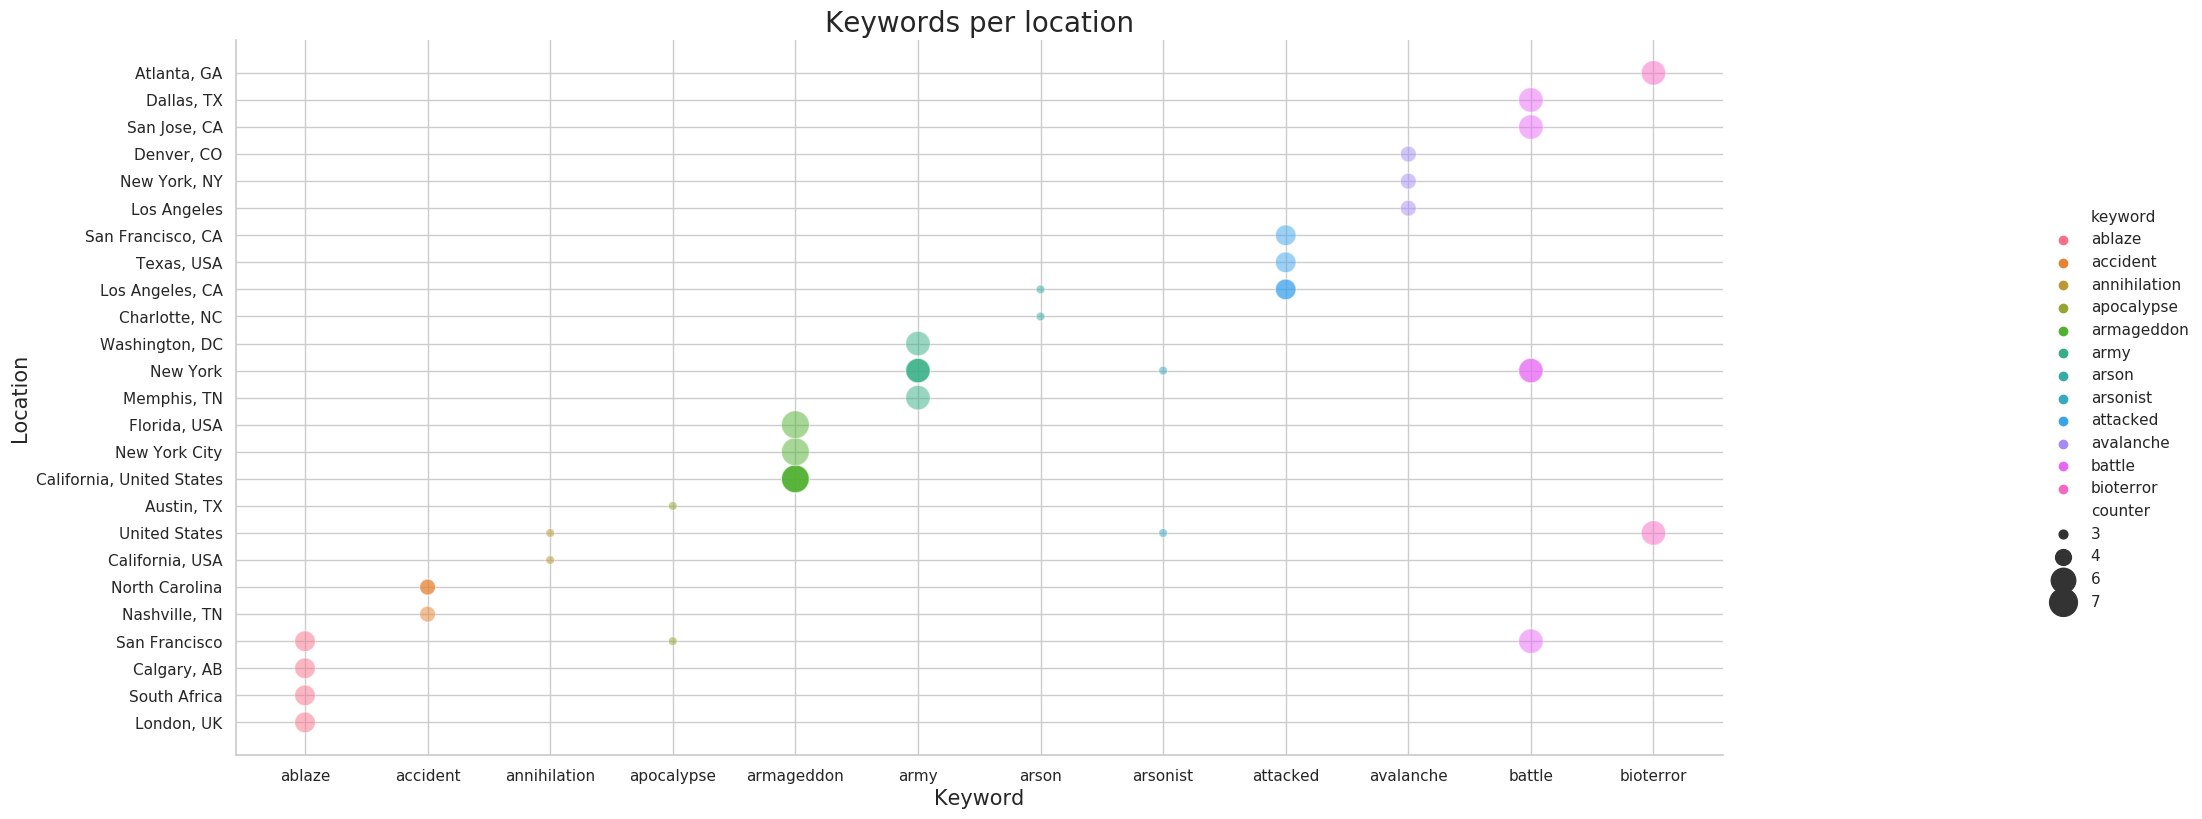

In [62]:
#scatterplot

g = sns.relplot(x = 'keyword', y = 'location', hue = 'keyword', size = 'counter',\
            sizes = (40, 400), alpha = .5, height = 8, data = locationAndKeyword)
g.ax.set_title('Keywords per location', fontsize = 20)
g.set_xlabels('Keyword',fontsize = 15)
g.set_ylabels('Location', fontsize = 15)
g.ax.figure.set_size_inches(28, 8)

In [63]:
tweetsInfo = pd.read_csv('./train.csv', encoding = 'latin-1', usecols = ['text', 'target'])
tweetsInfo.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [64]:
#Adding new column, tweet_length
tweetsInfo['tweet_length'] = tweetsInfo.text.str.len()

In [65]:
#Gets the hashtag or user
def getter(text, char):
    pos = text.find(char)
    text = text[pos:]
    #Some users or hashtags finish with : or .
    if text.endswith(':') or text.endswith('.'):
        text = text[:-1]
    return text

In [66]:
def validUser(userName):
    if '@' in userName:
        user = getter(userName, '@')
        length = len(user)
        if (length > 1 and length <= 16):
            for char in user[1:]:
                if not(char.isalnum() or char == '_'): return False
            return True
    return False

In [67]:
def validLink(link):
    type1 = 'https://'
    type2 = 'http://'
    if type1 in link and len(link) > 9: return True
    if type2 in link and len(link) > 8: return True
    return False

In [68]:
def validHashtag(hashtag):
    if '#' in hashtag:
        hashtag = getter(hashtag, '#')
        hashtag = hashtag[1:]
        return hashtag.isalnum()
    return False

In [69]:
#Function to analyze the elements (#. @, links) of the tweet
def analyzeTweets(text):
    result = [0,0,0] #number of usersTagged, hashtags and links
    text = text.split()
    for word in text:
        if validUser(word): result[0] += 1
        elif validHashtag(word): result[1] += 1
        elif validLink(word): result[2] += 1
    return result

In [78]:
#This function creates a new DF, char = # or @
#dicc is a dictionary, key: @user or #hashtag, value: [number of occurrence, number of true targets]
#func1 get the hashtag or user correctly
#func2 cheks if the result of func1 is correct
#text its a combination of two columns, text and target, the target is in the last position always
def dataFrameMaker(text, dicc, char, func1, func2):
    text = text.split()
    target = int(text[-1])
    for word in text:
        if char in word:
            auxString = func1(word, char)  #auxString could be a @user or a #hashtag
            if func2(auxString):
                auxString = auxString.lower()
                auxList = dicc[auxString] = dicc.get(auxString, [0,0])
                auxList[0] += 1
                auxList[1] += target

In [71]:
#Col1: column of the DF to filter
#condition: condition to filter
#col2: must be of type str
#col3: its type will be transform into str
#return a Serie with the combination of col2 and col3
def colsCombination(col1, condition, col2, col3):
        filterCondition = tweetsInfo[col1] > condition
        strCol2 = tweetsInfo[filterCondition][col2]
        strCol3 = tweetsInfo[filterCondition][col3]
        strCol3 = strCol3.astype(str)
        result = strCol2 + ' ' + strCol3
        return result

In [72]:
def getInfo(dataList, pos):
    return dataList[pos]

In [73]:
#Aux column to get the result
tweetsInfo['aux_column'] = tweetsInfo.text.apply(analyzeTweets)

tweetsInfo['users_tagged'] = tweetsInfo.aux_column.apply(getInfo,args=(0,))
tweetsInfo['hashtags'] = tweetsInfo.aux_column.apply(getInfo,args=(1,))
tweetsInfo['links'] = tweetsInfo.aux_column.apply(getInfo,args=(2,))

del tweetsInfo['aux_column']
tweetsInfo.head()

,text,target,tweet_length,users_tagged,hashtags,links
0,Our Deeds are the Reason of this #earthquake M...,1,69,0,1,0
1,Forest fire near La Ronge Sask. Canada,1,38,0,0,0
2,All residents asked to 'shelter in place' are ...,1,133,0,0,0
3,"13,000 people receive #wildfires evacuation or...",1,65,0,1,0
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0,2,0


In [79]:
#Building the usersTagged df
usersDicc = {}
tweetsInfoTags = colsCombination('users_tagged',0,'text','target')
tweetsInfoTags.apply(dataFrameMaker, args = (usersDicc,'@',getter,validUser))

31      None
36      None
43      None
54      None
63      None
        ... 
7577    None
7578    None
7581    None
7596    None
7609    None
Length: 1974, dtype: object

In [80]:
usersSerie = pd.Series(usersDicc)
usersDataFrame = usersSerie.to_frame(name='auxCol')
usersDataFrame['occurrence'] = usersDataFrame.auxCol.apply(getInfo,args=(0,))
usersDataFrame['target_sum'] = usersDataFrame.auxCol.apply(getInfo,args=(1,))
del usersDataFrame['auxCol']
usersDataFrame.head()

,occurrence,target_sum
@bbcmtd,1,1
@phdsquares,1,0
@southridgelife,1,0
@alexis_sanchez,1,0
@navista7,1,1


In [81]:
#Building the hashtags df
hashtagsDicc = {}
tweetsInfoHashtags = colsCombination('hashtags',0,'text','target')
tweetsInfoHashtags.apply(dataFrameMaker, args = (hashtagsDicc,'#',getter,validHashtag))

0       None
3       None
4       None
5       None
6       None
        ... 
7598    None
7599    None
7601    None
7604    None
7607    None
Length: 1697, dtype: object

In [82]:
hashtagsSerie = pd.Series(hashtagsDicc)
hashtagsDataFrame = hashtagsSerie.to_frame(name='auxCol')
hashtagsDataFrame['occurrence'] = hashtagsDataFrame.auxCol.apply(getInfo, args=(0,))
hashtagsDataFrame['target_sum'] = hashtagsDataFrame.auxCol.apply(getInfo, args=(1,))
del hashtagsDataFrame['auxCol']
hashtagsDataFrame.head()

,occurrence,target_sum
#earthquake,19,19
#wildfires,5,5
#alaska,2,1
#rockyfire,4,4
#cafire,2,2
